In [17]:
import numpy as np
from scipy.stats import uniform

theta = 1
n = 50
B = 1_000_000

X: np.ndarray = uniform.rvs(loc=0, scale=theta, size=n)
theta_hat = X.max()

In [18]:
# Parametric bootstrap
xx_para: np.ndarray = uniform.rvs(loc=0, scale=theta_hat, size=(B,n))
theta_para = xx_para.max(axis=1)

# Non-parametric Bootstrap
xx_non = np.random.choice(X, size=(B,n), replace=True)
theta_non: np.ndarray = xx_non.max(axis=1)

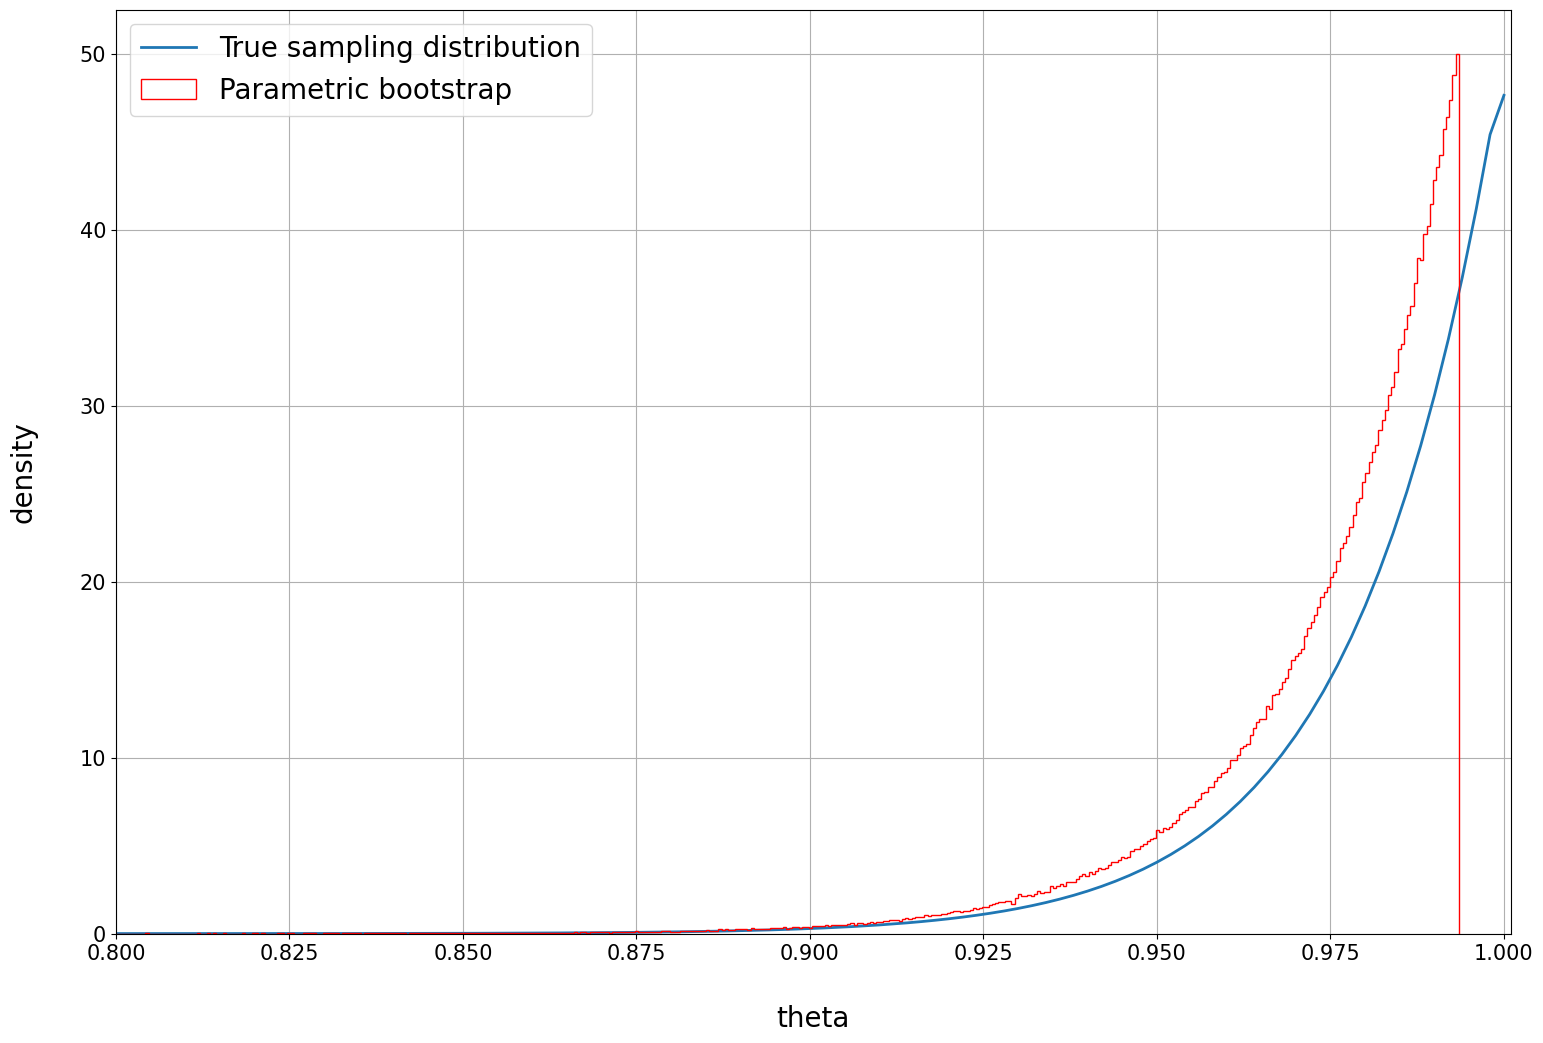

In [19]:
import matplotlib.pyplot as plt

# Compare with true sampling
bins = 500
tt = np.linspace(0, 1, bins+1)

theta_cdf: np.ndarray = uniform.cdf(tt, loc=0, scale=theta)**n
theta_pdf: np.ndarray = np.gradient(theta_cdf, tt)

font_size = 20
label_pad = 30

plt.figure(figsize=(18, 12))
plt.plot(tt, theta_pdf, linewidth=2)
plt.hist(theta_para, bins=bins, density=True, histtype='step', color='r')

plt.legend(
    [
        'True sampling distribution',
        'Parametric bootstrap',
    ], 
    fontsize=font_size
)

plt.xticks(fontsize=0.75*font_size)
plt.yticks(fontsize=0.75*font_size)

plt.xlabel('theta', fontsize=font_size, labelpad=label_pad)
plt.ylabel('density', fontsize=font_size, labelpad=label_pad)

plt.grid()
plt.xlim(.8, 1.001)

plt.show()

In [20]:
%reset -f